In [1]:
# first neural network with keras tutorial
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D, Dense, Dropout, MaxPooling1D, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import seaborn as sns

In [6]:
# load the dataset

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data['Malicious'] = train_data['Malicious']*1

In [7]:
# split into input (X) and output (y) variables
X_train = train_data.drop(['Malicious'], axis=1)
#X_train = X_train.drop(['id'], axis=1)
y_train = train_data['Malicious']

In [8]:
X_train.head()

,READ_EXTERNAL_STORAGE,RECEIVE_BOOT_COMPLETED,WRITE_CONTACTS,RECORD_AUDIO,ACCESS_CACHE_FILESYSTEM,RECEIVE,BILLING,READ,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_FINE_LOCATION,...,INTERACT_ACROSS_USERS_FULL,CHANGE_WIFI_STATE,MODIFY_AUDIO_SETTINGS,BLUETOOTH_ADMIN,RECEIVE_SMS,ACCESS_MTK_MMHW,UNINSTALL_SHORTCUT,READ_INTERNAL_STORAGE,ACCESS_COARSE_LOCATION,id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7032
1,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,1,0,0,0,0,11026
2,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,9772
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,844
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,14630


In [9]:
y_train.head()

0    0
1    1
2    1
3    0
4    1
Name: Malicious, dtype: int64

In [10]:
X_train.shape

(5654, 71)

In [11]:
X_train.describe()

,READ_EXTERNAL_STORAGE,RECEIVE_BOOT_COMPLETED,WRITE_CONTACTS,RECORD_AUDIO,ACCESS_CACHE_FILESYSTEM,RECEIVE,BILLING,READ,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_FINE_LOCATION,...,INTERACT_ACROSS_USERS_FULL,CHANGE_WIFI_STATE,MODIFY_AUDIO_SETTINGS,BLUETOOTH_ADMIN,RECEIVE_SMS,ACCESS_MTK_MMHW,UNINSTALL_SHORTCUT,READ_INTERNAL_STORAGE,ACCESS_COARSE_LOCATION,id
count,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,...,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000
mean,0.298727,0.399894,0.062434,0.081005,0.046162,0.341528,0.191546,0.023877,0.087195,0.309162,...,0.057835,0.215423,0.067740,0.043155,0.365759,0.050407,0.070923,0.053767,0.299788,10682.171029
std,0.457740,0.489920,0.241963,0.272866,0.209854,0.474264,0.393552,0.152679,0.282145,0.462189,...,0.233452,0.411152,0.251321,0.203225,0.481685,0.218802,0.256719,0.225578,0.458205,4534.362768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8278.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11289.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,14774.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16782.000000


In [12]:
len(train_data.id.unique())

5654

In [13]:
train_data['Malicious'].value_counts()

1    2845
0    2809
Name: Malicious, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


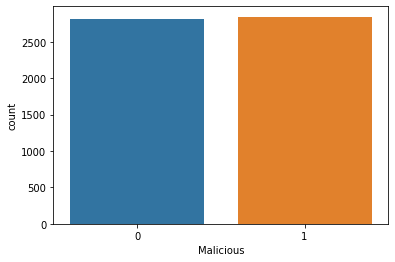

In [14]:
sns.countplot(train_data['Malicious'])

In [15]:
# model = Sequential()

# model.add(Dense(512, activation='relu', input_shape=(71,)))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# #relu is one of the deep learning 
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])

In [16]:
model = Sequential()

model.add(Conv1D(64, 3, input_shape=(71,1), activation='relu'))

model.add(Conv1D(filters=64, kernel_size=3, padding='same',  activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))

model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())


#Fully connected final layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 69, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 69, 64)            12352     
                                                                 
 conv1d_2 (Conv1D)           (None, 69, 32)            6176      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 34, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1088)              0         
                                                                 
 dense (Dense)               (None, 1)                 1089      
                                                        

In [18]:
checkpoint = ModelCheckpoint(filepath="best_model.hdf5", monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=3)

earlystopper = EarlyStopping(monitor='val_loss', patience=10)

callbackslist = [earlystopper, checkpoint]

In [19]:
history = model.fit(X_train, y_train, epochs=100,validation_split=0.2 ,callbacks=callbackslist, batch_size=32)

Epoch 1/100
142/142 [==============================] - ETA: 0s - loss: 2.5285 - accuracy: 0.7190
Epoch 1: val_loss improved from inf to 0.15461, saving model to best_model.hdf5
142/142 [==============================] - 9s 8ms/step - loss: 2.5285 - accuracy: 0.7190 - val_loss: 0.1546 - val_accuracy: 0.9381
Epoch 2/100
137/142 [===========================>..] - ETA: 0s - loss: 0.2069 - accuracy: 0.9245
Epoch 2: val_loss did not improve from 0.15461
142/142 [==============================] - 1s 6ms/step - loss: 0.2093 - accuracy: 0.9237 - val_loss: 0.1717 - val_accuracy: 0.9416
Epoch 3/100
138/142 [============================>.] - ETA: 0s - loss: 0.2548 - accuracy: 0.9291
Epoch 3: val_loss did not improve from 0.15461
142/142 [==============================] - 1s 7ms/step - loss: 0.2580 - accuracy: 0.9293 - val_loss: 0.1714 - val_accuracy: 0.9531
Epoch 4/100
140/142 [============================>.] - ETA: 0s - loss: 0.2603 - accuracy: 0.9297
Epoch 4: val_loss did not improve from 0.1546

In [20]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
plt.style.use('fivethirtyeight')

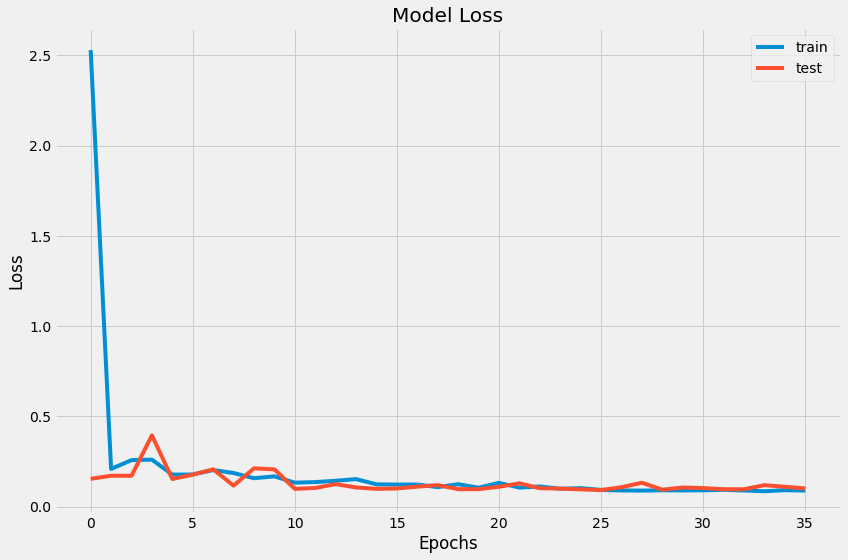

In [21]:
plt.figure(figsize=(12,8), tight_layout=True)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

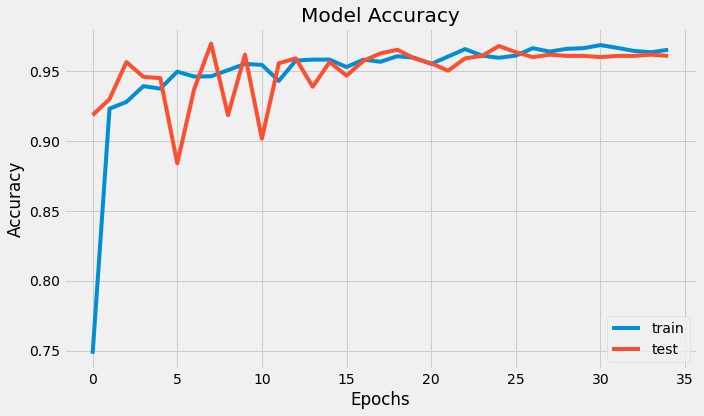

In [ ]:
plt.figure(figsize=(10,6), tight_layout=True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
print(model.evaluate(X_train, y_train))

177/177 [==============================] - 1s 3ms/step - loss: 0.0958 - accuracy: 0.9673
[0.09583686292171478, 0.9672797918319702]


In [ ]:
test_data.shape

(2424, 71)

In [ ]:
test_predictions = model.predict(test_data)

76/76 [==============================] - 0s 2ms/step


In [ ]:
test_predictions = test_predictions > 0.5
test_predictions

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
test_predictions = np.array(test_predictions).ravel()

In [ ]:
test_predictions = test_predictions.tolist()

In [ ]:
test_predictions

[False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,


In [ ]:
output = pd.DataFrame({
"id": test_data["id"],
"Malicious": test_predictions
})

In [ ]:
idColumn = pd.DataFrame({
"id": test_data["id"]
})

In [ ]:
test_data = test_data.drop(['id'], axis=1)

In [ ]:
test_predictions = model.predict(test_data)

76/76 [==============================] - 0s 2ms/step


In [ ]:
test_predictions = test_predictions > 0.5
test_predictions = np.array(test_predictions).ravel()
test_predictions

array([False, False, False, ..., False, False, False])

In [ ]:
output = pd.DataFrame({
"id": idColumn['id'],
"Malicious": test_predictions
})

In [ ]:
output.to_csv('submission.csv', index=False)

In [ ]:
df_sum = pd.read_csv('submission.csv')

In [ ]:
df_sum.head()

,id,Malicious
0,6090,False
1,16279,False
2,4416,False
3,15152,True
4,13377,False
